In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
data = pd.read_csv('./datasets/data.csv')

In [6]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
data.isna().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [8]:
data.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
data.shape

(569, 33)

In [10]:
data.drop('id', axis=1, inplace=True)

In [11]:
data.drop('Unnamed: 32', axis=1, inplace=True)

In [12]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [13]:
Y = data['diagnosis']
X = data.drop('diagnosis', axis=1)
feature_names = X.columns

<Axes: >

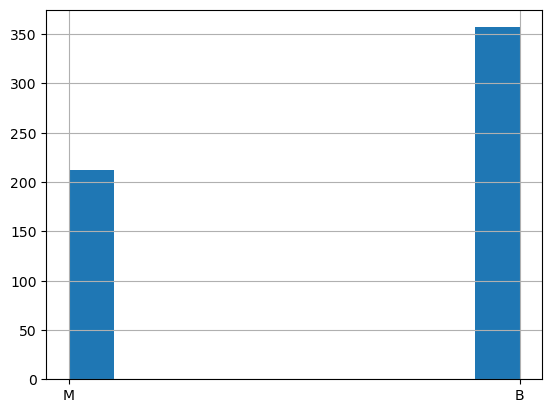

In [14]:
Y.hist()

In [17]:
Y.replace('B', 0, inplace=True)
Y.replace('M', 1, inplace=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123456, stratify=Y)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
scaler.fit(X_train)

MinMaxScaler()

In [24]:
X_train = scaler.transform(X_train)

In [35]:
X_train = pd.DataFrame(X_train, columns=feature_names)

In [37]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.276823,0.203585,0.270196,0.154146,0.340977,0.176199,0.136715,0.152982,0.325758,0.203506,...,0.219139,0.195362,0.213208,0.103372,0.346690,0.243374,0.297094,0.336186,0.342362,0.260958
1,0.697099,0.254988,0.671066,0.594910,0.372032,0.185387,0.273664,0.420726,0.331818,0.012872,...,0.811811,0.384328,0.742517,0.726947,0.373548,0.133608,0.244530,0.625430,0.224519,0.112423
2,0.326045,0.371660,0.317739,0.187190,0.389546,0.236124,0.086410,0.117744,0.282828,0.375499,...,0.253291,0.339286,0.242841,0.123722,0.301684,0.179326,0.117692,0.235223,0.162509,0.339314
3,0.601022,0.404802,0.595052,0.445599,0.409317,0.336783,0.436504,0.548211,0.516162,0.159565,...,0.527215,0.603412,0.533841,0.332973,0.268293,0.338162,0.404615,0.774914,0.589214,0.274131
4,0.246060,0.365573,0.231014,0.133701,0.248262,0.043525,0.055834,0.087972,0.342929,0.151132,...,0.192458,0.554904,0.170178,0.089117,0.199332,0.050691,0.097863,0.255361,0.268235,0.156030


In [38]:
X_train.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.339940,0.324507,0.334271,0.218123,0.393291,0.240309,0.203925,0.240905,0.379051,0.277504,...,0.297768,0.366778,0.284436,0.171565,0.343382,0.233296,0.228935,0.393103,0.319443,0.321404
std,0.166541,0.149169,0.167878,0.149484,0.126244,0.162447,0.187337,0.193937,0.139201,0.148557,...,0.171306,0.168034,0.167261,0.140028,0.162052,0.170312,0.172305,0.225358,0.145199,0.188689
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223461,0.214068,0.214999,0.117253,0.304685,0.120892,0.067045,0.099913,0.282323,0.167776,...,0.179651,0.239139,0.167351,0.080638,0.233631,0.116953,0.093462,0.220095,0.224519,0.184846
50%,0.306877,0.308590,0.298839,0.175673,0.389591,0.205394,0.138472,0.162500,0.365152,0.251553,...,0.250800,0.358076,0.235719,0.123759,0.335075,0.186256,0.193632,0.339708,0.298289,0.278787
75%,0.425789,0.411228,0.417110,0.272980,0.471879,0.319222,0.282099,0.365706,0.451010,0.353640,...,0.386073,0.486874,0.375342,0.220040,0.435431,0.319355,0.323312,0.543127,0.384177,0.420651
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
X_train.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [27]:
knn = KNeighborsClassifier()

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(X_train)

In [42]:
def report(y, y_pred):
    print(pd.DataFrame(confusion_matrix(y, y_pred), columns=['B', 'M'], index=['B', 'M']))
    print('-'*80)
    print(classification_report(y, y_pred))

In [43]:
report(y_train, y_pred)

     B    M
B  266    1
M    8  151
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       267
           1       0.99      0.95      0.97       159

    accuracy                           0.98       426
   macro avg       0.98      0.97      0.98       426
weighted avg       0.98      0.98      0.98       426



In [44]:
y_test_pred = knn.predict(X_test)

In [45]:
report(y_test, y_test_pred)

   B   M
B  0  90
M  0  53
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        90
           1       0.37      1.00      0.54        53

    accuracy                           0.37       143
   macro avg       0.19      0.50      0.27       143
weighted avg       0.14      0.37      0.20       143



/home/natasa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/natasa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/natasa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
params = {
    'n_neighbors': range(10,100,5),
    'weights': ['uniform', 'disance'],
    'p': [1,2]
}

In [48]:
estimator = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=6, verbose=4)

In [49]:
estimator.fit(X_train, y_train)

Fitting 6 folds for each of 72 candidates, totalling 432 fits
[CV 1/6] END n_neighbors=10, p=1, weights=uniform;, score=0.972 total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=uniform;, score=0.930 total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=uniform;, score=0.972 total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=uniform;, score=0.915 total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, weights=uniform;, score=0.944 total time=   0.0s
[CV 1/6] END n_neighbors=10, p=1, weights=disance;, score=nan total time=   0.0s
[CV 2/6] END n_neighbors=10, p=1, weights=disance;, score=nan total time=   0.0s
[CV 3/6] END n_neighbors=10, p=1, weights=disance;, score=nan total time=   0.0s
[CV 4/6] END n_neighbors=10, p=1, weights=disance;, score=nan total time=   0.0s
[CV 5/6] END n_neighbors=10, p=1, weights=disance;, score=nan total time=   0.0s
[CV 6/6] END n_neighbors=10, p=1, w

/home/natasa/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
216 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
216 fits failed with the following error:
Traceback (most recent call last):
  File "/home/natasa/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/natasa/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/home/natasa/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
 

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(10, 100, 5), 'p': [1, 2],
                         'weights': ['uniform', 'disance']},
             verbose=4)

In [50]:
X_test = scaler.transform(X_test)

In [51]:
X_test = pd.DataFrame(X_test, columns=feature_names)

In [53]:
estimator.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [55]:
estimator.best_params_

{'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}

In [56]:
best_knn = estimator.best_estimator_

In [57]:
y_pred1 = best_knn.predict(X_train)

In [58]:
report(y_train, y_pred1)

     B    M
B  266    1
M   11  148
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       267
           1       0.99      0.93      0.96       159

    accuracy                           0.97       426
   macro avg       0.98      0.96      0.97       426
weighted avg       0.97      0.97      0.97       426



In [59]:
y_test_pred2 = best_knn.predict(X_test)

In [60]:
report(y_test, y_test_pred2)

    B   M
B  89   1
M   1  52
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

